**Titanic Survival Prediction**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv('/content/tested.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']
The non-numeric columns are : ['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


In [ ]:
# Separate numerical and categorical features
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

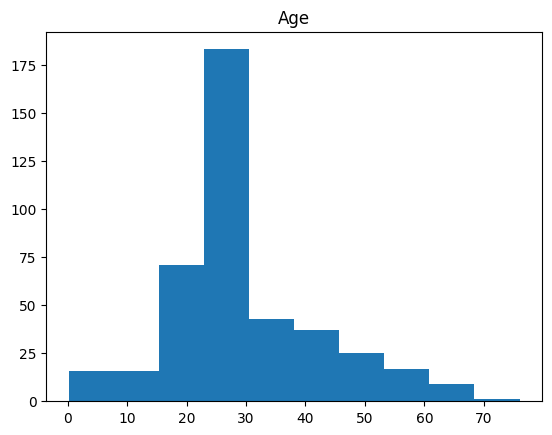

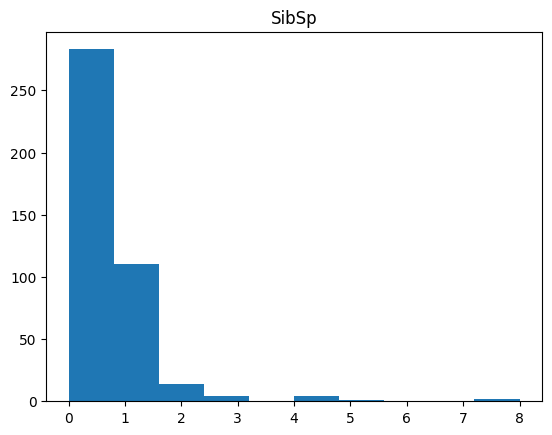

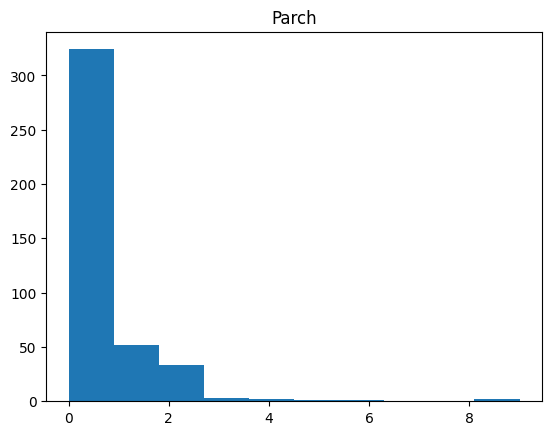

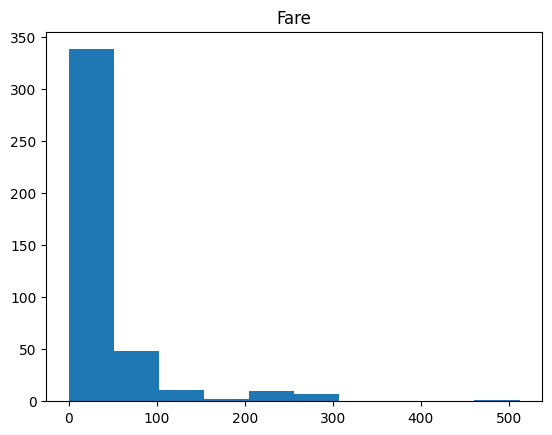

In [ ]:
# Data Visualization for Numerical Features
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [ ]:
# Calculate and display correlation matrix for numerical features
print(df_num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.079535 -0.045073  0.329071
SibSp -0.079535  1.000000  0.306895  0.171539
Parch -0.045073  0.306895  1.000000  0.230046
Fare   0.329071  0.171539  0.230046  1.000000


<Axes: >

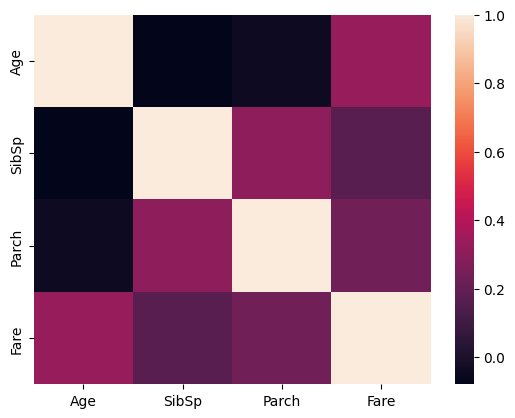

In [ ]:
# Visualize the correlation matrix
sns.heatmap(df_num.corr())

In [ ]:
# Pivot tables for selected numerical features by 'Survived' class
pd.pivot_table(df, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.272699,27.527877,0.274436,0.379699
1,30.272400,49.747699,0.598684,0.565789


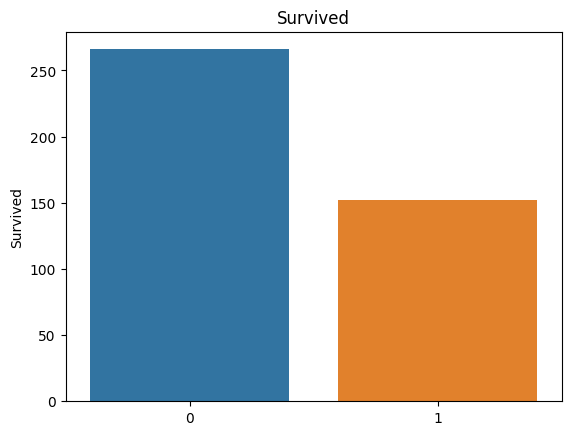

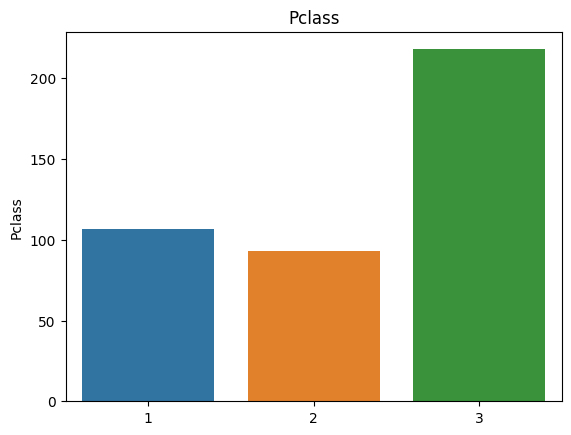

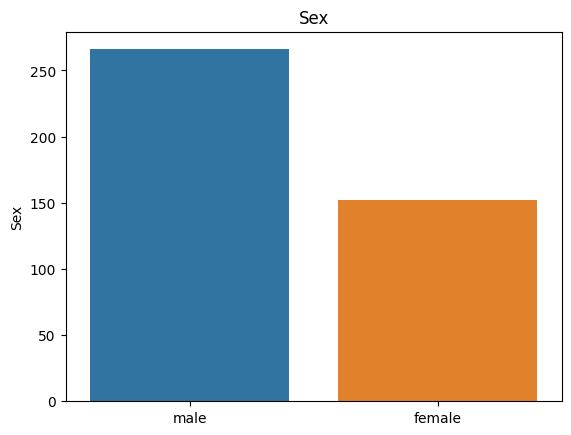

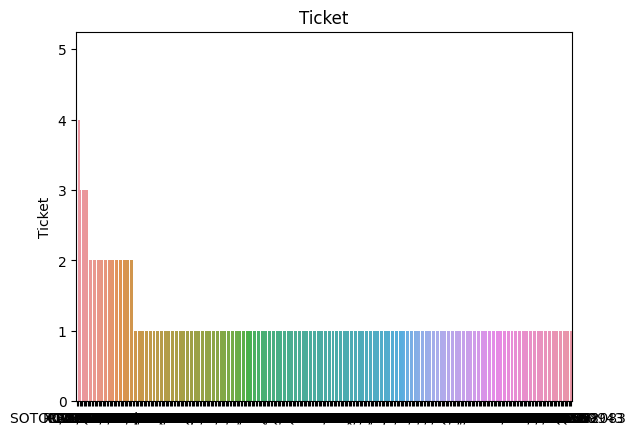

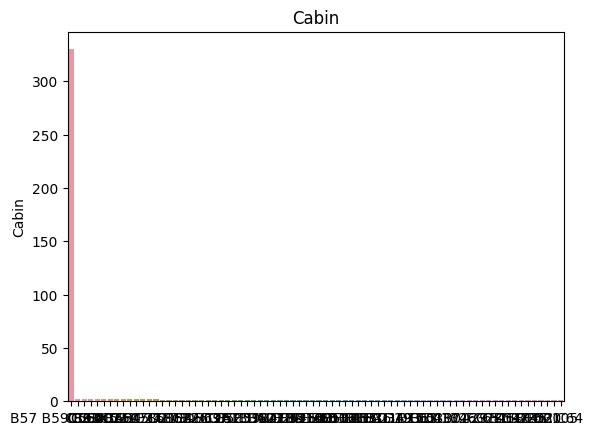

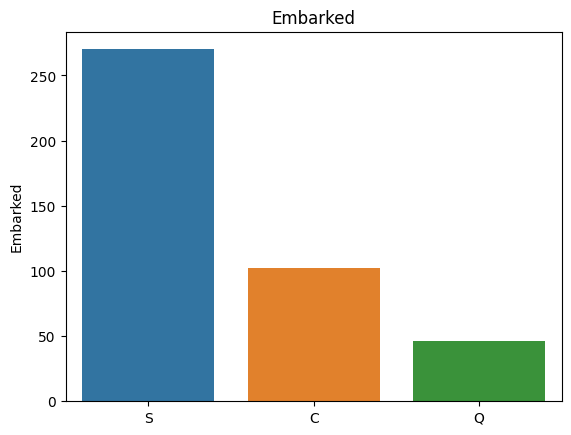

In [ ]:
# Data Visualization for Categorical Features
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts()).set_title(i)
    plt.show()

In [ ]:
# Pivot tables for categorical features by 'Survived' class
print(pd.pivot_table(df, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print(pd.pivot_table(df, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print(pd.pivot_table(df, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass     1   2    3
Survived             
0         57  63  146
1         50  30   72
Sex       female   male
Survived               
0            NaN  266.0
1          152.0    NaN
Embarked   C   Q    S
Survived             
0         62  22  182
1         40  24   88


In [ ]:
# Feature Engineering
# Create a new feature 'cabin_multiple' based on the number of cabins a passenger has
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [ ]:
# Create a new feature 'cabin_adv' based on the first character of the cabin
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
print(df['cabin_adv'].value_counts())

B    345
C     35
D     13
E      9
F      8
A      7
G      1
Name: cabin_adv, dtype: int64


In [ ]:
# Create a new feature 'numeric_ticket' to indicate if the ticket is numeric
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)


In [ ]:
# Create a new feature 'ticket_letters' to extract letters from the ticket
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [ ]:
# Create a new feature 'name_title' to extract the title from the passenger's name
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(df['name_title'].value_counts())

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: name_title, dtype: int64


In [ ]:
# Data Preprocessing
# Fill missing values in 'Age' and 'Fare' with their medians
df.Age = df.Age.fillna(df.Age.median())
df.Fare = df.Fare.fillna(df.Fare.median())


In [ ]:
# Drop rows with missing values in 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)

In [ ]:
# Log-transform numerical features 'SibSp' and 'Fare'
df['norm_sibsp'] = np.log(df.SibSp + 1)
df['norm_fare'] = np.log(df.Fare + 1)

In [ ]:
# Convert 'Pclass' to string type for one-hot encoding
df.Pclass = df.Pclass.astype(str)

In [ ]:
# Create dummy variables for categorical features
all_dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title']])

In [ ]:
# Feature Scaling
# Scale selected features
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']])

In [ ]:
# Split the dataset into training and testing sets
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(all_dummies_scaled, y, test_size=0.33, random_state=42)

In [ ]:
# Model Selection and Evaluation
# Gaussian Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [ ]:
# Decision Tree
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1.         0.98214286 1.         0.98214286 0.94642857]
0.9821428571428571


In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [ ]:
# Support Vector Classifier
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1.         1.         1.         0.98214286 0.98214286]
0.9928571428571429
